<a href="https://colab.research.google.com/github/Riya-gh/GNSS-/blob/main/GNSS_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()


Saving combined_data.csv to combined_data.csv



📊 Logistic Regression Results:
Accuracy: 0.6989089383130508

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73     12790
           1       0.69      0.64      0.66     11040

    accuracy                           0.70     23830
   macro avg       0.70      0.70      0.70     23830
weighted avg       0.70      0.70      0.70     23830



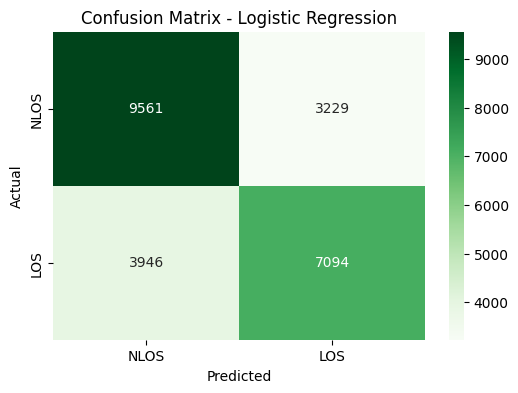

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the combined CSV (if not already loaded)
df = pd.read_csv("combined_data.csv")
df['Label'] = df['Label'].map({'LOS': 1, 'NLOS': 0})

# Step 2: Prepare data
X = df[['Elevation', 'Azimuth', 'SNR']]
y = df['Label']

# Step 3: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = log_model.predict(X_test)

print("\n📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['NLOS', 'LOS'], yticklabels=['NLOS', 'LOS'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
